## Linear regression

In [1]:
# here we are going to implement linear regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
global _path_nonull, _path_withmean

_path_nonull = os.path.dirname(os.getcwd()) + '/no null/no-null-horse-details.csv'
_path_withmean = os.path.dirname(os.getcwd()) + '/no null/with-mean-horse-details.csv'

In [3]:
hd_nonull = pd.read_csv(_path_nonull)  # data with no null values
hd_withmean = pd.read_csv(_path_withmean)  # data with mean in place on null values

In [4]:
''' we are impleamenting linear regression and 
in which there are two variables independent-variable(x) and 
dependent variable(y) '''
''

''

In [5]:
hd_nonull.head()

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,1,2,H2,F,56.0,522.0,No
1,6,7,H7,F,68.0,975.0,Yes
2,9,10,H10,M,65.0,862.0,Yes
3,14,15,H15,F,57.0,514.0,No
4,19,20,H20,F,29.0,211.0,Yes


In [6]:
# extracting independent and dependent variable for no-null dataset
x_nonull = hd_nonull.iloc[:, 4:5].values  # predictor
y_nonull = hd_nonull.iloc[:, 5:6].values  # predicted value
y_nonull

array([[522.],
       [975.],
       [862.],
       ...,
       [636.],
       [495.],
       [590.]])

In [7]:
''' This is how slicing done on iloc
--> df.iloc[1:2, 3:4] = df.iloc[row_index_slicing, column_index_slicing]
'''
s_type = hd_nonull.loc[:,'Horse-Height']  # this is series type
type(s_type)

pandas.core.series.Series

In [8]:
# extracting independent and dependent variable for with-mean dataset
x_withmean = hd_withmean.iloc[:, 4:5].values  # predictor
y_withmean = hd_withmean.iloc[:, 5:6].values  # predicted value
y_withmean

array([[605.18653043],
       [522.        ],
       [605.18653043],
       ...,
       [380.        ],
       [590.        ],
       [605.18653043]])

### now visulaizing our data

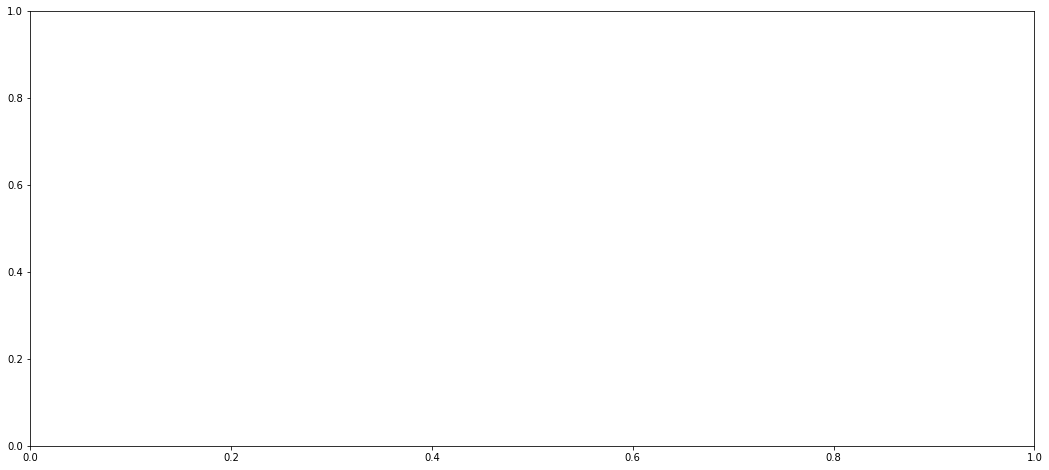

In [9]:
# we can change the size of plot using matplot
plot_dim = (18, 8)
plot_size = plt.subplots(figsize=plot_dim)

# use this plot size to change the dimension of plot area

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horse-Height', ylabel='Density'>

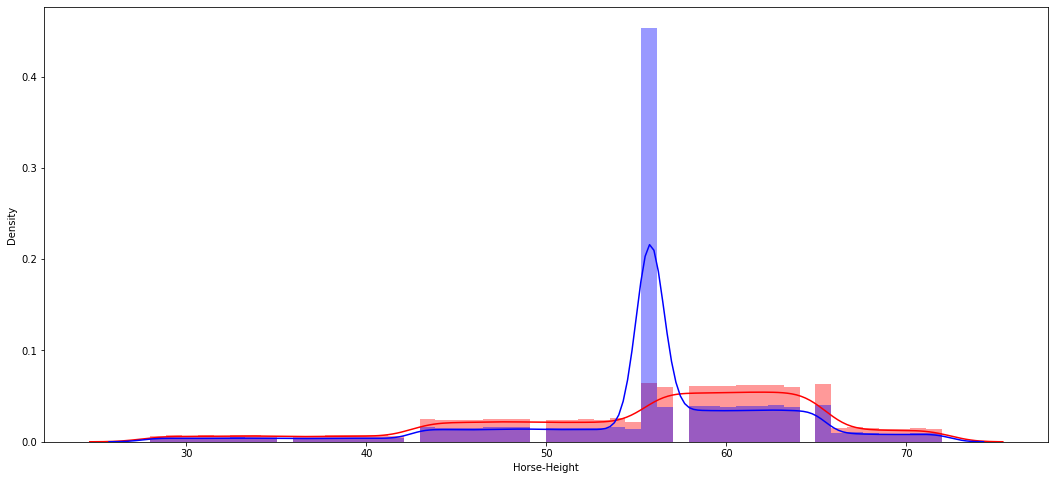

In [10]:
''' here we can see that in both dataset, the density of 
horses wrt to their height is high in with-mean dataset but
In nonull dataset density is not very high. This happend because
we have many values same as the mean of heights.
So, from this we can conclude that the weight-distgraph will be
similar to this graph.
'''
plt.subplots(figsize=plot_dim)
# visualizing density of horses with respect to their heights
sns.distplot(hd_nonull['Horse-Height'], color='red')
sns.distplot(hd_withmean['Horse-Height'], color='blue')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horse-Weight', ylabel='Density'>

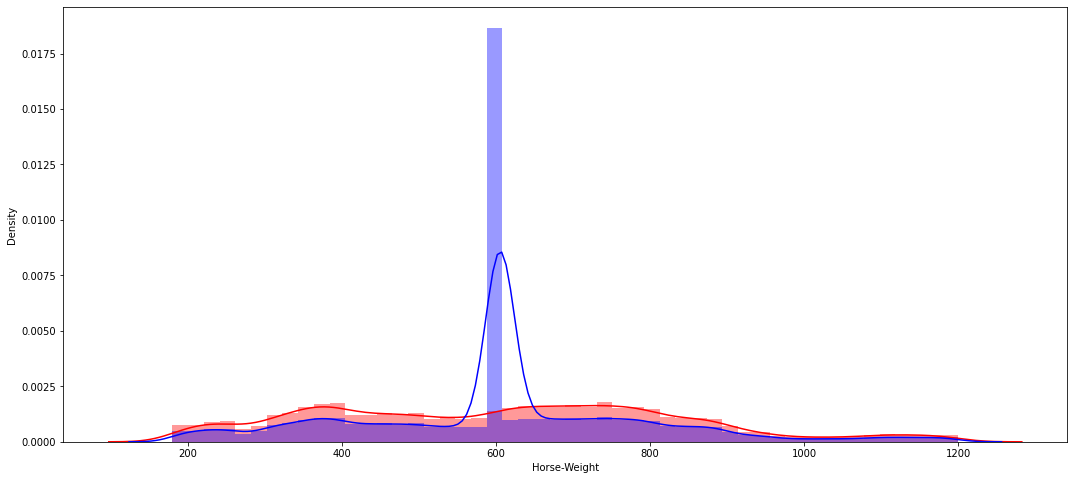

In [11]:
plt.subplots(figsize=plot_dim)
# visualizing density of horses with respect to their Weights
sns.distplot(hd_nonull['Horse-Weight'], color='red')
sns.distplot(hd_withmean['Horse-Weight'], color='blue')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Horse-Height', ylabel='count'>

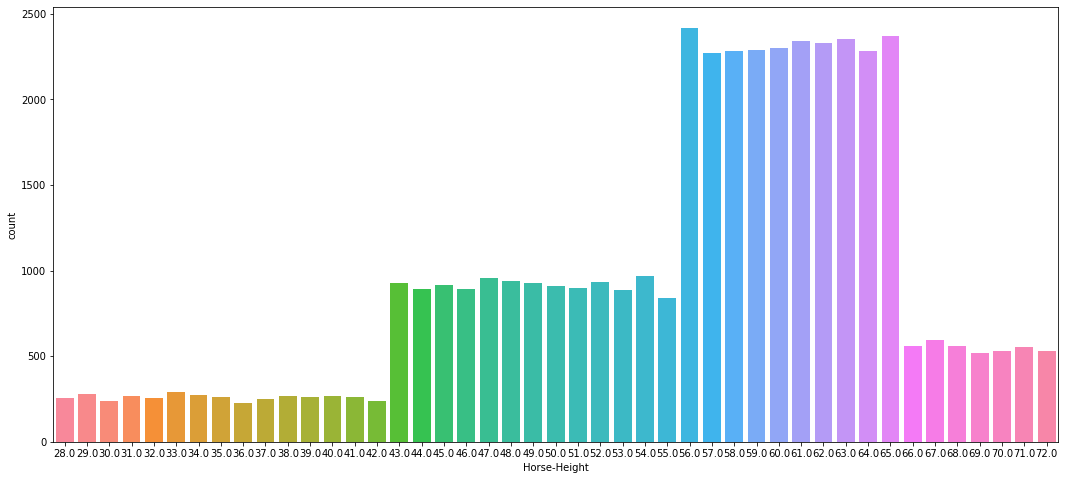

In [12]:
plt.subplots(figsize=(18, 8))
sns.countplot(hd_nonull['Horse-Height'], saturation=1)

<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

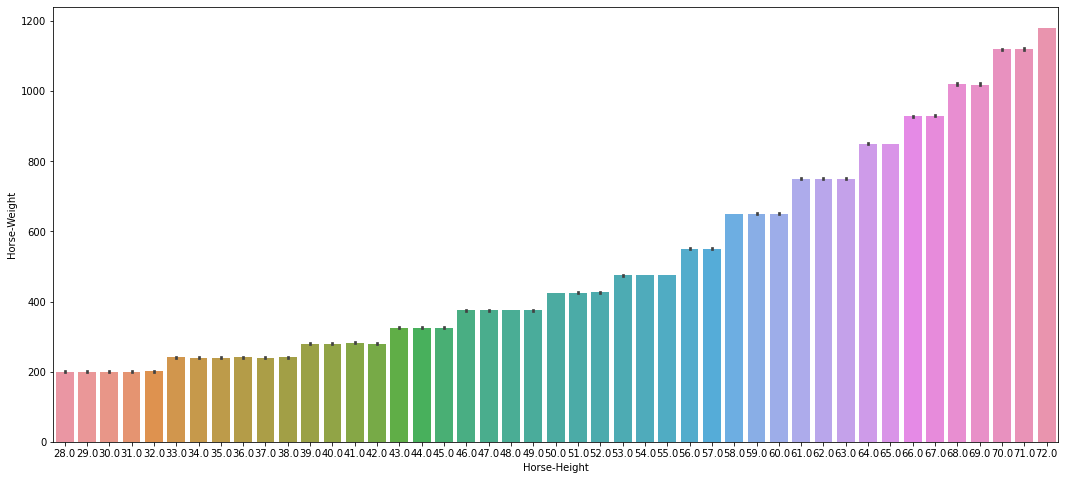

In [13]:
# here, i want to display the graph that how height matters to weight of nonull dataset
plt.subplots(figsize=plot_dim)
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd_nonull)

<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

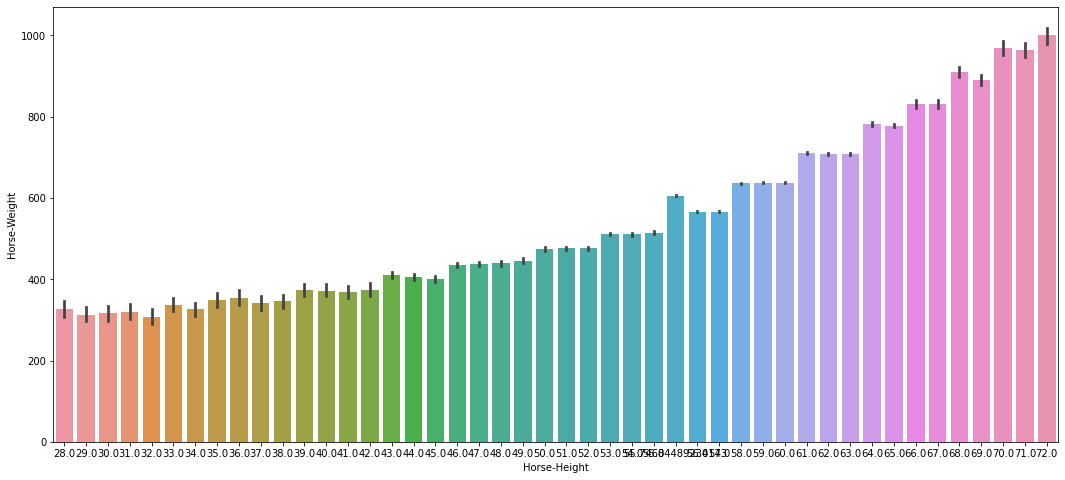

In [14]:
# here, i want to display the graph that how height matters to weight of nonull dataset
plt.subplots(figsize=plot_dim)
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd_withmean)

In [15]:
hd_plot = pd.DataFrame({
    'Height': hd_nonull['Horse-Height'],
    'Weight': hd_nonull['Horse-Weight']
})
hd_plot

,Height,Weight
0,56.0,522.0
1,68.0,975.0
2,65.0,862.0
3,57.0,514.0
4,29.0,211.0
...,...,...
42862,62.0,759.0
42863,60.0,612.0
42864,60.0,636.0
42865,53.0,495.0


<AxesSubplot:>

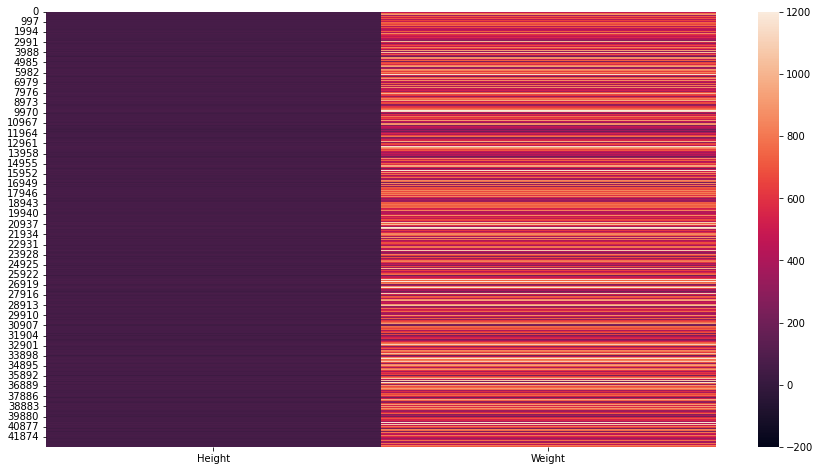

In [16]:
''' The height of horse is between 28 to 72 so the
color difference is not much but in weight section,
weight is between 200 to 1200 that's why color difference is too high.
'''
plt.subplots(figsize=(15, 8))
sns.heatmap(data=hd_plot, vmin=-200, vmax=1200)

<AxesSubplot:>

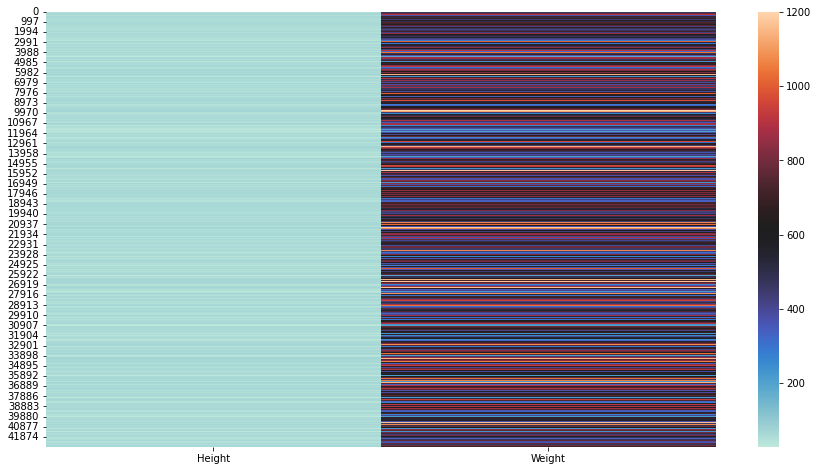

In [17]:
# the center parameter set the blackcolor to the given number
plt.subplots(figsize=(15, 8))
sns.heatmap(data=hd_plot, center=614)

### now, we are going to implement the linear regression

In [18]:
# we want to split our dataset into test and training data
from sklearn.model_selection import train_test_split

x_train_nonull, x_test_nonull, y_train_nonull, y_test_nonull = train_test_split(x_nonull, y_nonull, test_size=1/4, random_state=0)
x_train_withmean, x_test_withmean, y_train_withmean, y_test_withmean = train_test_split(x_withmean, y_withmean, test_size=1/4, random_state=0)
x_train_nonull


array([[60.],
       [62.],
       [63.],
       ...,
       [45.],
       [51.],
       [52.]])

In [19]:
# now fitting simple linear regression model into our dataset
from sklearn.linear_model import LinearRegression
lr_nonull = LinearRegression()
lr_withmean = LinearRegression()

# now fit the model
lr_nonull.fit(X=x_train_nonull, y=y_train_nonull)
lr_withmean.fit(x_train_withmean, y_train_withmean)

LinearRegression()

In [20]:
# now we are predicting the test set result
y_pred_nonull = lr_nonull.predict(x_test_nonull)
y_pred_withmean = lr_withmean.predict(x_test_withmean)
print(y_pred_nonull)
y_pred_withmean

[[634.17702519]
 [703.27394508]
 [588.11241194]
 ...
 [380.82165228]
 [818.43547822]
 [495.98318542]]


array([[605.18490864],
       [214.00428621],
       [411.67970332],
       ...,
       [839.9764404 ],
       [164.58543193],
       [642.30102329]])

Text(0, 0.5, 'Horse Weight')

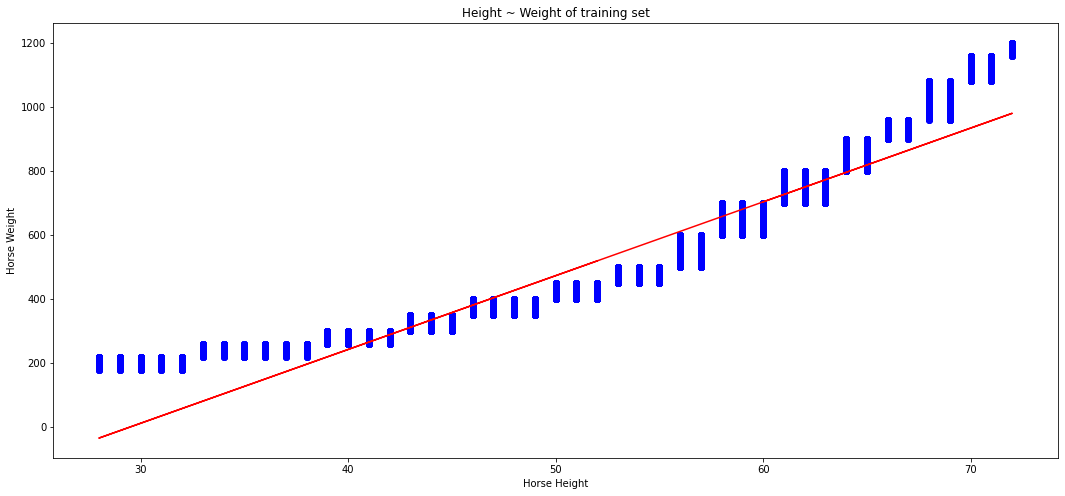

In [21]:
# now visulize the training set result for nonull
plt.subplots(figsize=(18, 8))
plt.scatter(x_train_nonull, y_train_nonull, color='blue')
plt.plot(x_train_nonull, lr_nonull.predict(x_train_nonull), color='red')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')

Text(0, 0.5, 'Horse Weight')

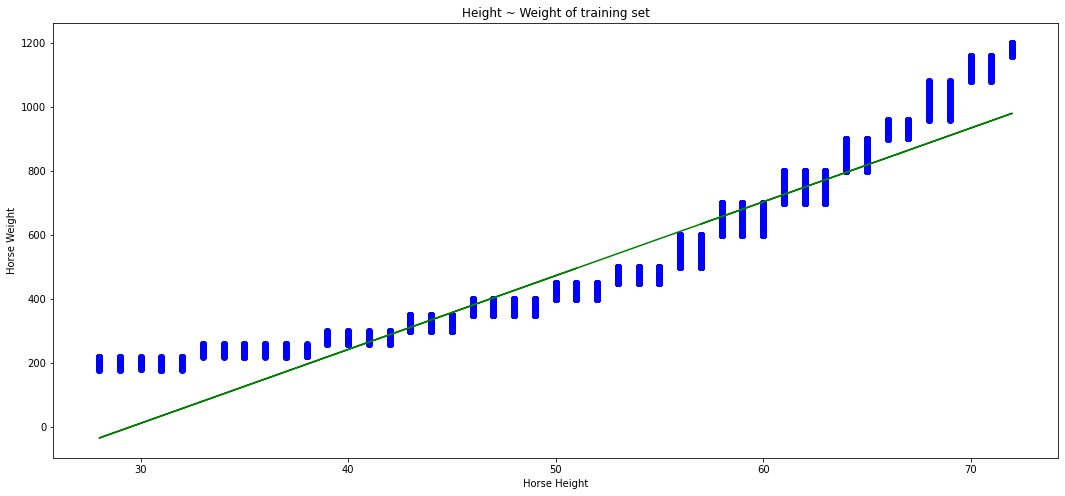

In [22]:
# now visulaize the test dataset for nonull
plt.subplots(figsize=(18, 8))
plt.scatter(x_test_nonull, y_test_nonull, color='blue')
plt.plot(x_test_nonull, lr_nonull.predict(x_test_nonull), color='green')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')

## calculating error

In [23]:
# now calculate the residuals for nonull
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test_nonull, y_pred_nonull))
print('MSE: ', metrics.mean_squared_error(y_test_nonull, y_pred_nonull))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_nonull, y_pred_nonull)))

MAE:  60.314924821147216
MSE:  6030.563693601472
RMSE:  77.65670411240404


Text(0, 0.5, 'Horse Weight')

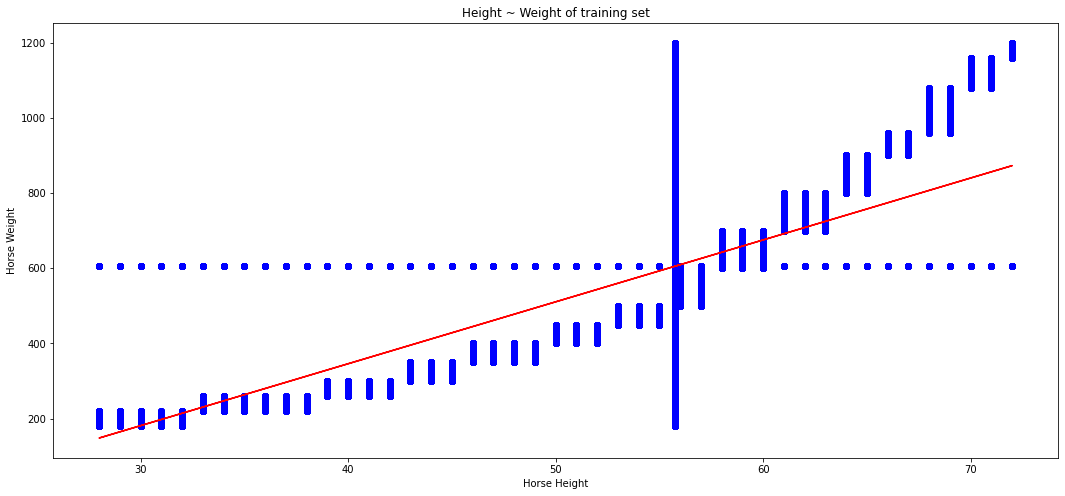

In [24]:
# now visulize the training set result for withmean
plt.subplots(figsize=(18, 8))
plt.scatter(x_train_withmean, y_train_withmean, color='blue')
plt.plot(x_train_withmean, lr_withmean.predict(x_train_withmean), color='red')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')

Text(0, 0.5, 'Horse Weight')

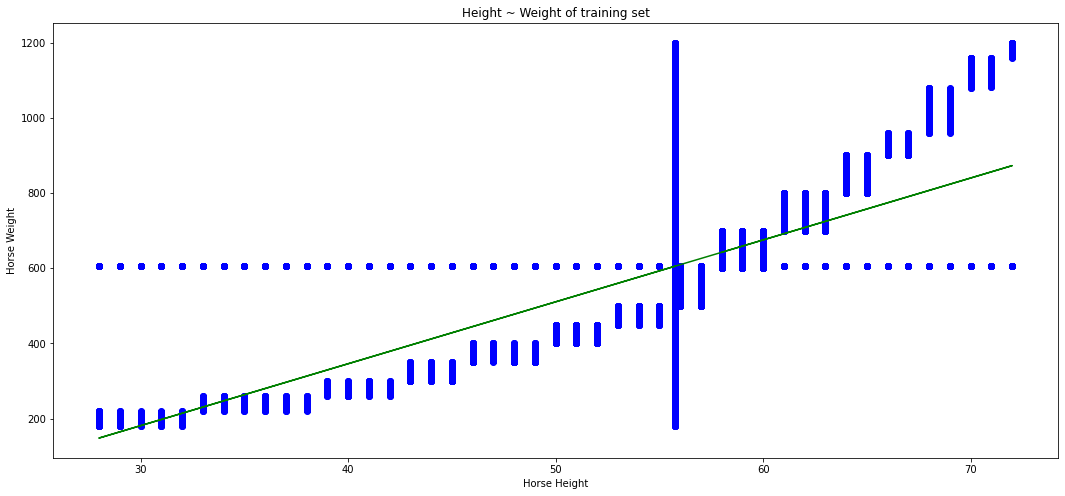

In [25]:
# now visulaize the test dataset for withmean
plt.subplots(figsize=(18, 8))
plt.scatter(x_test_withmean, y_test_withmean, color='blue')
plt.plot(x_test_withmean, lr_withmean.predict(x_test_withmean), color='green')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')

## calculating error

In [26]:
# now calculate the residuals for withmean
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test_withmean, y_pred_withmean))
print('MSE: ', metrics.mean_squared_error(y_test_withmean, y_pred_withmean))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_withmean, y_pred_withmean)))

MAE:  92.87764136739032
MSE:  18290.48078845075
RMSE:  135.24230398973077


In [ ]:
''' RMSE, MSE and MAE values confirm that the with-mean 
dataset is not that much accurate as nonull dataset.
'''